# **Lab Task: Comparing RNN Architectures**
## **RNN vs LSTM vs BiLSTM vs GRU for Sentiment Analysis**

---

**📋 Lab Objectives**
By the end of this lab, students will:
1. Implement basic RNN, LSTM, BiLSTM, and GRU models
2. Compare their performance on a real-world task
3. Understand the advantages and limitations of each architecture
4. Analyze training time, accuracy, and memory usage

---

## **Task Overview**
**Problem:** Sentiment Analysis of Movie Reviews  
**Dataset:** IMDB Movie Reviews (positive/negative sentiment)  
**Goal:** Build and compare 4 different models to classify movie review sentiment

---

In [1]:
### Part 1: Data Preparation**

import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, SimpleRNN, LSTM, Bidirectional, GRU
import matplotlib.pyplot as plt
import time

# Load IMDB dataset
max_features = 5000  # vocabulary size
maxlen = 200  # maximum review length

print("Loading IMDB dataset...")
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

# Pad sequences to same length
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)

print(f"Training data shape: {x_train.shape}")
print(f"Test data shape: {x_test.shape}")


Loading IMDB dataset...
17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Training data shape: (25000, 200)
Test data shape: (25000, 200)


In [2]:
### Part 2: Model Implementation

#### Task 2.1: Basic RNN Model

def create_rnn_model():
    model = Sequential([
        Embedding(max_features, 128),
        SimpleRNN(64, dropout=0.2, recurrent_dropout=0.2),
        Dense(1, activation='sigmoid')
    ])
    return model

# TODO: Compile the model with appropriate optimizer and loss
rnn_model = create_rnn_model()
rnn_model.summary()

# Compile the model with the appropriate optimizer and loss
rnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Show the model summary
rnn_model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn (SimpleRNN)          │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn (SimpleRNN)          │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [3]:
####  Task 2.2: LSTM Model

def create_lstm_model():
    model = Sequential([
        Embedding(max_features, 128),
        LSTM(64, dropout=0.2, recurrent_dropout=0.2),
        Dense(1, activation='sigmoid')
    ])
    return model

# TODO: Create and compile LSTM model
lstm_model = create_lstm_model()
lstm_model.summary()
# Compile the LSTM model with the appropriate optimizer and loss
lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Show the LSTM model summary
lstm_model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [4]:
# Task 2.3: Bidirectional LSTM Model

def create_bilstm_model():
    # TODO: Create BiLSTM model using Bidirectional wrapper
    model = Sequential([
        Embedding(max_features, 128),
        # Your code here: Add Bidirectional LSTM layer
        Dense(1, activation='sigmoid')
    ])
    return model

bilstm_model = create_bilstm_model()

bilstm_model.summary()

from tensorflow.keras.layers import Bidirectional

def create_bilstm_model():
    model = Sequential([
        Embedding(max_features, 128),
        Bidirectional(LSTM(64, dropout=0.2, recurrent_dropout=0.2)),  # Bidirectional LSTM layer
        Dense(1, activation='sigmoid')
    ])
    return model

bilstm_model = create_bilstm_model()

# Show the BiLSTM model summary
bilstm_model.summary()

# Compile the BiLSTM model
bilstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [5]:
# Task 2.4: GRU Model

def create_gru_model():
    model = Sequential([
        Embedding(max_features, 128),
        GRU(64, dropout=0.2, recurrent_dropout=0.2),  # GRU layer
        Dense(1, activation='sigmoid')
    ])
    return model

# Create the GRU model
gru_model = create_gru_model()

# Show the GRU model summary
gru_model.summary()

# Compile the GRU model
gru_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])



Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru (GRU)                       │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

### **Part 3: Training and Evaluation**

In [8]:
# Split data into training and validation sets
validation_split = 10000  # You can adjust this split size based on your dataset size
x_val = x_train[:validation_split]
y_val = y_train[:validation_split]
x_train = x_train[validation_split:]
y_train = y_train[validation_split:]

# Training configuration
batch_size = 32
epochs = 3
models = {
    'RNN': rnn_model,
    'LSTM': lstm_model,
    'BiLSTM': bilstm_model,
    'GRU': gru_model
}

results = {}

# Train and evaluate each model
for model_name, model in models.items():
    print(f"\nTraining {model_name}...")

    start_time = time.time()

    # Train the model
    history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_val, y_val))

    # Record training time
    training_time = time.time() - start_time

    # Evaluate the model on test data
    test_loss, test_accuracy = model.evaluate(x_test, y_test, batch_size=batch_size)

    # Store the results for each model
    results[model_name] = {
        'training_time': training_time,
        'test_accuracy': test_accuracy,
        'test_loss': test_loss,
        'params': model.count_params()
    }

# Print the results
for model_name, result in results.items():
    print(f"\n{model_name} Results:")
    print(f"Training Time: {result['training_time']} seconds")
    print(f"Test Accuracy: {result['test_accuracy']}")
    print(f"Test Loss: {result['test_loss']}")
    print(f"Number of Parameters: {result['params']}")




Training RNN...
Epoch 1/3
469/469 ━━━━━━━━━━━━━━━━━━━━ 16s 24ms/step - accuracy: 0.5177 - loss: 0.7042 - val_accuracy: 0.5400 - val_loss: 0.6800
Epoch 2/3
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.5698 - loss: 0.6755 - val_accuracy: 0.6191 - val_loss: 0.6494
Epoch 3/3
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - accuracy: 0.6434 - loss: 0.6252 - val_accuracy: 0.6214 - val_loss: 0.6282
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.6151 - loss: 0.6327

Training LSTM...
Epoch 1/3
469/469 ━━━━━━━━━━━━━━━━━━━━ 331s 687ms/step - accuracy: 0.6773 - loss: 0.5858 - val_accuracy: 0.8040 - val_loss: 0.4213
Epoch 2/3
469/469 ━━━━━━━━━━━━━━━━━━━━ 327s 698ms/step - accuracy: 0.8277 - loss: 0.3900 - val_accuracy: 0.7983 - val_loss: 0.4352
Epoch 3/3
469/469 ━━━━━━━━━━━━━━━━━━━━ 372s 676ms/step - accuracy: 0.8617 - loss: 0.3305 - val_accuracy: 0.8397 - val_loss: 0.3698
782/782 ━━━━━━━━━━━━━━━━━━━━ 85s 109ms/step - accuracy: 0.8407 - loss: 0.3764

Training BiLSTM...
Epoch 1/3
469

### **Part 4: Analysis and Comparison**


        training_time  test_accuracy  test_loss    params
RNN         34.603375        0.61780   0.630064  652417.0
LSTM      1034.630259        0.84100   0.375058  689473.0
BiLSTM    1871.473528        0.77960   0.532700  738945.0
GRU        944.981713        0.86756   0.310158  677313.0


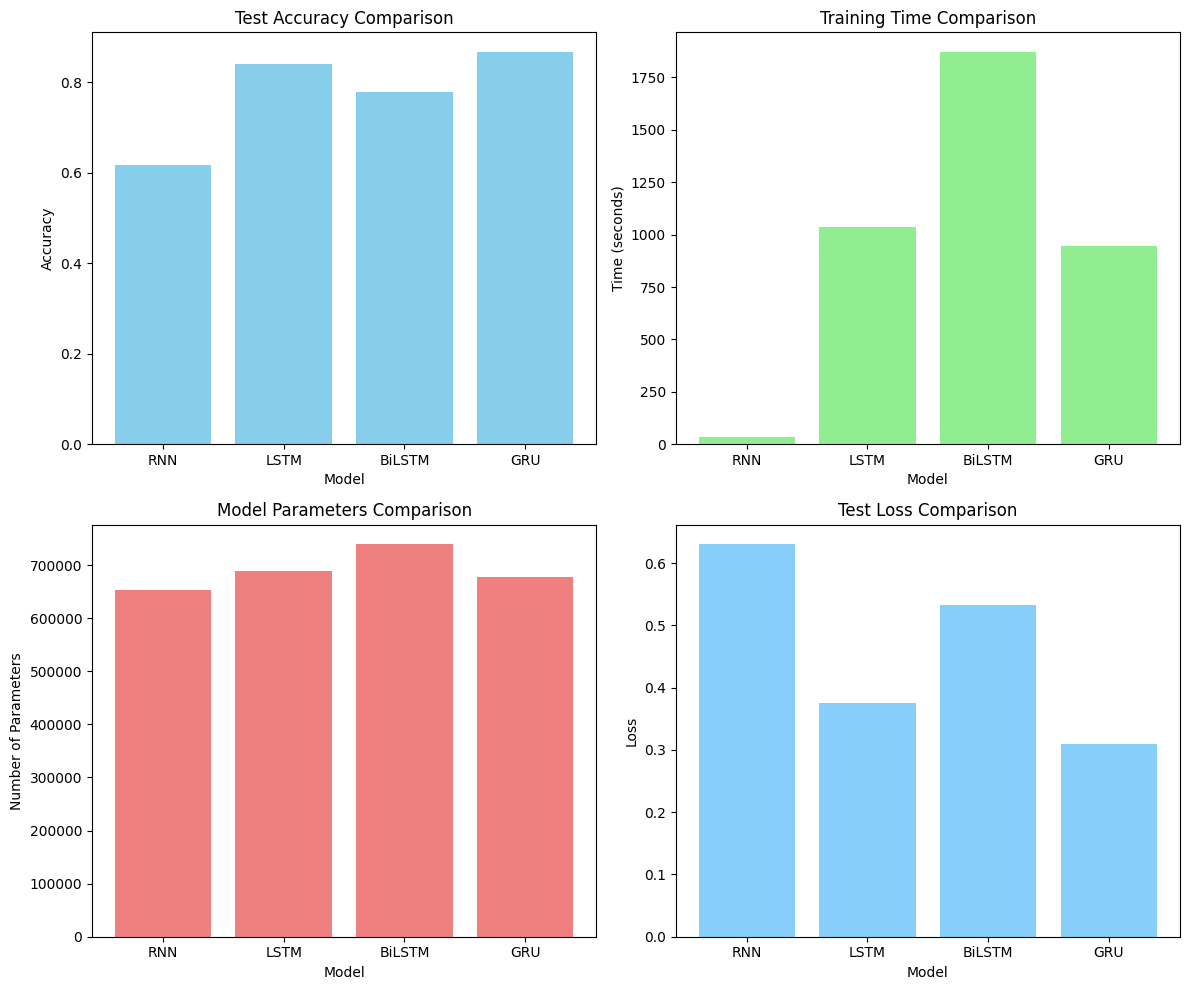

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert results to DataFrame
df_results = pd.DataFrame(results).T
print(df_results)

# TODO: Create visualizations
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Plot 1: Accuracy comparison
axes[0, 0].bar(df_results.index, df_results['test_accuracy'], color='skyblue')
axes[0, 0].set_title('Test Accuracy Comparison')
axes[0, 0].set_xlabel('Model')
axes[0, 0].set_ylabel('Accuracy')

# Plot 2: Training time comparison
axes[0, 1].bar(df_results.index, df_results['training_time'], color='lightgreen')
axes[0, 1].set_title('Training Time Comparison')
axes[0, 1].set_xlabel('Model')
axes[0, 1].set_ylabel('Time (seconds)')

# Plot 3: Model parameters comparison
axes[1, 0].bar(df_results.index, df_results['params'], color='lightcoral')
axes[1, 0].set_title('Model Parameters Comparison')
axes[1, 0].set_xlabel('Model')
axes[1, 0].set_ylabel('Number of Parameters')

# Plot 4: Loss comparison
axes[1, 1].bar(df_results.index, df_results['test_loss'], color='lightskyblue')
axes[1, 1].set_title('Test Loss Comparison')
axes[1, 1].set_xlabel('Model')
axes[1, 1].set_ylabel('Loss')

plt.tight_layout()
plt.show()


        training_time  test_accuracy  test_loss    params  memory_usage
RNN         34.603375        0.61780   0.630064  652417.0      2.488773
LSTM      1034.630259        0.84100   0.375058  689473.0      2.630131
BiLSTM    1871.473528        0.77960   0.532700  738945.0      2.818851
GRU        944.981713        0.86756   0.310158  677313.0      2.583744


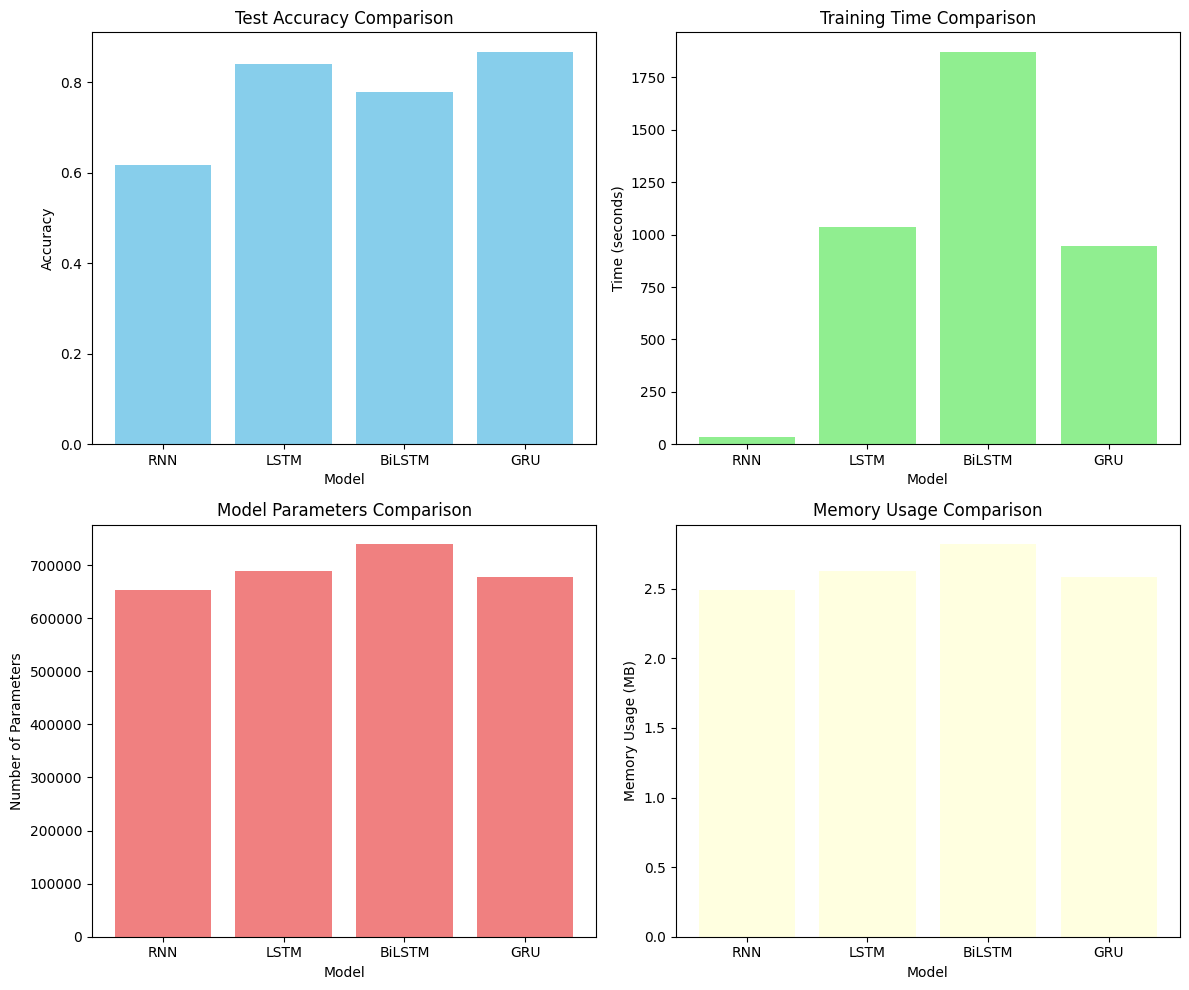

In [12]:
import numpy as np

# Add memory usage calculation to results
results_with_memory = {}

for model_name, result in results.items():
    # Estimate memory usage (number of parameters * 4 bytes per parameter for float32)
    memory_usage = result['params'] * 4 / (1024 ** 2)  # Convert bytes to MB
    results_with_memory[model_name] = {
        'training_time': result['training_time'],
        'test_accuracy': result['test_accuracy'],
        'test_loss': result['test_loss'],
        'params': result['params'],
        'memory_usage': memory_usage  # Memory usage in MB
    }

# Convert to DataFrame
df_results_with_memory = pd.DataFrame(results_with_memory).T
print(df_results_with_memory)

# TODO: Create visualizations with memory usage comparison
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Plot 1: Accuracy comparison
axes[0, 0].bar(df_results_with_memory.index, df_results_with_memory['test_accuracy'], color='skyblue')
axes[0, 0].set_title('Test Accuracy Comparison')
axes[0, 0].set_xlabel('Model')
axes[0, 0].set_ylabel('Accuracy')

# Plot 2: Training time comparison
axes[0, 1].bar(df_results_with_memory.index, df_results_with_memory['training_time'], color='lightgreen')
axes[0, 1].set_title('Training Time Comparison')
axes[0, 1].set_xlabel('Model')
axes[0, 1].set_ylabel('Time (seconds)')

# Plot 3: Model parameters comparison
axes[1, 0].bar(df_results_with_memory.index, df_results_with_memory['params'], color='lightcoral')
axes[1, 0].set_title('Model Parameters Comparison')
axes[1, 0].set_xlabel('Model')
axes[1, 0].set_ylabel('Number of Parameters')

# Plot 4: Memory usage comparison
axes[1, 1].bar(df_results_with_memory.index, df_results_with_memory['memory_usage'], color='lightyellow')
axes[1, 1].set_title('Memory Usage Comparison')
axes[1, 1].set_xlabel('Model')
axes[1, 1].set_ylabel('Memory Usage (MB)')

plt.tight_layout()
plt.show()


## **Expected Results Template**

| Model  | Accuracy | Training Time | Parameters | Memory Usage |
|--------|----------|---------------|------------|--------------|
| RNN    |   0.61780     | 34.603375      | 652417.0    | 2.488773            |
| LSTM   |   0.84100  | 1034.630259       | 689473.0     | 2.630131           |
| BiLSTM |   0.77960  | 1871.473528       | 738945.0   | 2.818851           |
| GRU    |   0.86756   | 944.981713       | 677313.0    | 2.583744        |

---